In [1]:
#importing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as sts

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# File to Load
value_add = "value_add_kabao.csv"

In [3]:
# Import the data into a Pandas DataFrame
data_df = pd.read_csv(value_add)
data_df.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
0,DOMESTIC INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1010.0,DULUTH,...,Georgia,SOUTHEAST,US,2016.Q3,2016.08,39947,2016.08.25,7869.31,35,224.84
1,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1025.0,CHARLOTTE,...,North Carolina,MID ATLANTIC,US,2018.Q4,2018.10,39956,2018.10.11,9737.28,36,270.48
2,DOMESTIC INVOICE,2017,OSB,Finished Product,VALUE ADD,OSB TN 350,OSB TN 350,A,1025.0,CHESAPEAKE,...,Virginia,MID ATLANTIC,US,2017.Q4,2017.12,22651,2017.12.15,10884.16,37,294.17
3,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1005.0,SCHERTZ,...,Texas,SOUTHWEST,US,2018.Q1,2018.03,39956,2018.03.02,13598.50,36,377.74
4,DOMESTIC INVOICE,2018,OSB,Finished Product,VALUE ADD,OSB TN 350,OSB TN 350,A,1015.0,TUCKER,...,Georgia,SOUTHEAST,US,2018.Q1,2018.02,22651,2018.02.20,11917.67,37,322.10


In [4]:
data_df.count()

0BILL_TYPE___T             215158
0FISCYEAR                  219230
0DIVISION___T              219230
Transactoin State          219230
Material Level 2           219230
Material Level 3           219230
Material Group             219230
Material Grade             219225
Plant Nbr                  219229
Ship To City               219230
Ship To County             206097
Ship To State              219230
Ship To Region             219222
Ship To Country            215070
Cal_Quarter_text           219230
Fiscal_Year_Period_Text    219230
Product ID                 219230
Date                       219230
Mill_Amount_in_SC          219230
Qty_in_Conv_Vol            219230
ASP                        219197
dtype: int64

In [5]:
drop_df = data_df.dropna(how='any')

In [6]:
drop_df.count()

0BILL_TYPE___T             205979
0FISCYEAR                  205979
0DIVISION___T              205979
Transactoin State          205979
Material Level 2           205979
Material Level 3           205979
Material Group             205979
Material Grade             205979
Plant Nbr                  205979
Ship To City               205979
Ship To County             205979
Ship To State              205979
Ship To Region             205979
Ship To Country            205979
Cal_Quarter_text           205979
Fiscal_Year_Period_Text    205979
Product ID                 205979
Date                       205979
Mill_Amount_in_SC          205979
Qty_in_Conv_Vol            205979
ASP                        205979
dtype: int64

In [7]:
# Load and sort the dataframe.
dropped_df = pd.read_csv('value_add_kabao.csv', parse_dates=['Date'], index_col='Date')
df_dv = dropped_df.filter(['Date', 'Qty_in_Conv_Vol'])
df_dv.head()

,Qty_in_Conv_Vol
Date,
2016-08-25,35
2018-10-11,36
2017-12-15,37
2018-03-02,36
2018-02-20,37


In [8]:
# resample stationary data to monthly since there are missing dates due to weekends
df_m = df_dv['Qty_in_Conv_Vol'].resample('M').mean()
df_m.head()

Date
2014-01-31    10.285946
2014-02-28    34.664545
2014-03-31    37.350276
2014-04-30    37.406119
2014-05-31    39.527968
Freq: M, Name: Qty_in_Conv_Vol, dtype: float64

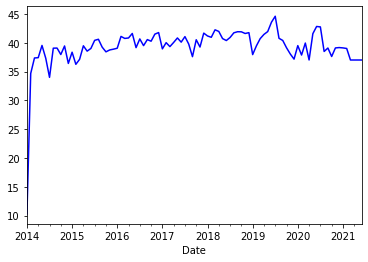

In [9]:
# chart the initial monthly data and do a prelimiary test to see if it's stationary 
fig, ax = plt.subplots()
df_m.plot(ax=ax, color = 'blue')
plt.show()

# TENNESSEE

In [10]:
# File to Load
Tennessee_Weather = "tennessee.csv"
Tennessee_Weather = pd.read_csv(Tennessee_Weather)
Tennessee_Weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,1/1/2014 0:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-15,33,19,89,0.0,1024,-8,10,55,19
1,1/1/2014 3:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-15,25,28,89,0.0,1023,-9,10,42,15
2,1/1/2014 6:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-17,20,68,92,0.0,1023,-10,10,46,14
3,1/1/2014 9:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-17,24,69,90,0.0,1023,-10,10,40,18
4,1/1/2014 12:00,-5,-10,0.2,3.5,2,1,0,8:16 AM,6:33 PM,...,-12,23,100,84,0.0,1023,-6,10,55,18


In [11]:
# Tennessee_Weather.info()

In [12]:
# convert the 'Date' column to datetime format 
# Tennessee_Weather['date_time']= pd.to_datetime(Tennessee_Weather['date_time'])
Tennessee_Weather['Date']= pd.to_datetime(Tennessee_Weather['date_time'])
# Tennessee_Weather.info()

In [34]:
# Filter the data so that only AK data is in the dataframe
DataFrame_TN = data_df.loc[data_df["Ship To State"] == "Tennessee", :]
DataFrame_TN.head()

,0BILL_TYPE___T,0FISCYEAR,0DIVISION___T,Transactoin State,Material Level 2,Material Level 3,Material Group,Material Grade,Plant Nbr,Ship To City,...,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Date,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
37,DOMESTIC INVOICE,2015,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1015.0,MURFREESBORO,...,Tennessee,SOUTHEAST,US,2015.Q4,2015.10,9100,2015.10.01,7137.72,36,198.27
63,NaN,2020,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1005.0,NASHVILLE,...,Tennessee,SOUTHEAST,NaN,2020.Q2,2020.05,10007,2020-05-09,8500.80,36,236.13
65,DOMESTIC INVOICE,2019,OSB,Finished Product,VALUE ADD,OSB TechShield,OSB TechShield,A,1621.0,COLUMBIA,...,Tennessee,NATIONAL,US,2019.Q2,2019.06,39960,2019.06.10,3472.03,18,192.89
74,DOMESTIC INVOICE,2019,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1010.0,PIPERTON,...,Tennessee,SOUTHEAST,US,2019.Q4,2019.12,39947,2019.12.03,4024.08,35,114.97
92,DOMESTIC INVOICE,2016,OSB,Finished Product,VALUE ADD,OSB Long-Lengths,OSB Long-Lengths,A,1010.0,PIPERTON,...,Tennessee,SOUTHEAST,US,2016.Q2,2016.06,39947,2016.06.08,7392.38,35,211.21


In [14]:
# DataFrame_TN.info()

In [15]:
# convert the 'Date' column to datetime format 
DataFrame_TN['Date']= pd.to_datetime(DataFrame_TN['Date'])

# DataFrame_TN.info()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# Merge two dataframes using an inner join
Merged_TN_df = pd.merge(Tennessee_Weather, DataFrame_TN, on="Date")
Merged_TN_df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,Ship To County,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
0,1/14/2014 0:00,3,-4,0.0,6.6,2,1,90,5:06 PM,6:59 AM,...,MONTGOMERY,Tennessee,SOUTHEAST,US,2014.Q1,2014.01,22651,-8830.82,-34,259.73
1,1/14/2014 0:00,3,-4,0.0,6.6,2,1,90,5:06 PM,6:59 AM,...,MONTGOMERY,Tennessee,SOUTHEAST,US,2014.Q1,2014.01,22651,-8830.82,-34,259.73
2,1/14/2014 0:00,3,-4,0.0,6.6,2,1,90,5:06 PM,6:59 AM,...,MONTGOMERY,Tennessee,SOUTHEAST,US,2014.Q1,2014.01,22651,8830.82,34,259.73
3,1/14/2014 0:00,3,-4,0.0,6.6,2,1,90,5:06 PM,6:59 AM,...,MONTGOMERY,Tennessee,SOUTHEAST,US,2014.Q1,2014.01,22651,8830.82,34,259.73
4,1/14/2014 0:00,3,-4,0.0,6.6,2,1,90,5:06 PM,6:59 AM,...,MONTGOMERY,Tennessee,SOUTHEAST,US,2014.Q1,2014.01,22651,-8830.82,-34,259.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,12/31/2019 0:00,1,-2,0.0,3.5,1,1,26,12:07 PM,11:14 PM,...,CHEATHAM,Tennessee,SOUTHEAST,US,2019.Q4,2019.12,22651,9581.91,37,258.97
11804,12/31/2019 0:00,1,-2,0.0,3.5,1,1,26,12:07 PM,11:14 PM,...,CHEATHAM,Tennessee,SOUTHEAST,US,2019.Q4,2019.12,22651,-9581.91,-37,258.97
11805,12/31/2019 0:00,1,-2,0.0,3.5,1,1,26,12:07 PM,11:14 PM,...,CHEATHAM,Tennessee,SOUTHEAST,US,2019.Q4,2019.12,22651,-8927.90,-37,241.29
11806,1/1/2020 0:00,8,-2,0.0,8.7,2,1,37,12:33 PM,No moonset,...,FAYETTE,Tennessee,SOUTHEAST,US,2020.Q1,2020.01,39947,5845.35,35,167.01


In [17]:
#Drop unwanted columns.
Merged_TN_df.drop(columns=['sunHour', 'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                       'sunrise', 'sunset', 'FeelsLikeC', 'DewPointC', 'tempC', 'winddirDegree', 'cloudcover', 'visibility', 
                        '0BILL_TYPE___T', '0DIVISION___T', 'Material Level 3', 'Material Group', 'Plant Nbr', 
                        'Cal_Quarter_text', 'Product ID', 'Fiscal_Year_Period_Text', 'Ship To Region', 
                       'Material Grade', 'Ship To County', 'maxtempC', 'mintempC', 'pressure', 'date_time', 'Ship To Country', 
                       'Transactoin State'])

,totalSnow_cm,HeatIndexC,WindChillC,WindGustKmph,humidity,precipMM,windspeedKmph,Date,0FISCYEAR,Material Level 2,Ship To City,Ship To State,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
0,0.0,0,-5,36,93,0.0,17,2014-01-14,2014,VALUE ADD,CLARKSVILLE,Tennessee,-8830.82,-34,259.73
1,0.0,0,-5,36,93,0.0,17,2014-01-14,2014,VALUE ADD,CLARKSVILLE,Tennessee,-8830.82,-34,259.73
2,0.0,0,-5,36,93,0.0,17,2014-01-14,2014,VALUE ADD,CLARKSVILLE,Tennessee,8830.82,34,259.73
3,0.0,0,-5,36,93,0.0,17,2014-01-14,2014,VALUE ADD,CLARKSVILLE,Tennessee,8830.82,34,259.73
4,0.0,0,-5,36,93,0.0,17,2014-01-14,2014,VALUE ADD,CLARKSVILLE,Tennessee,-8830.82,-34,259.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,0.0,-2,-10,44,72,0.0,32,2019-12-31,2019,VALUE ADD,ASHLAND CITY,Tennessee,9581.91,37,258.97
11804,0.0,-2,-10,44,72,0.0,32,2019-12-31,2019,VALUE ADD,ASHLAND CITY,Tennessee,-9581.91,-37,258.97
11805,0.0,-2,-10,44,72,0.0,32,2019-12-31,2019,VALUE ADD,ASHLAND CITY,Tennessee,-8927.90,-37,241.29
11806,0.0,-1,-5,23,91,0.0,13,2020-01-01,2020,VALUE ADD,COLLIERVILLE,Tennessee,5845.35,35,167.01


In [35]:
TN_df.to_csv(r'All_TN_Weather.csv', index = False)

# TN 2018

In [18]:
TN_df = Merged_TN_df.loc[Merged_TN_df['0FISCYEAR']==2018]
TN_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,Ship To County,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
7641,1/2/2018 0:00,-13,-24,0.0,8.7,2,1,100,6:51 PM,8:45 AM,...,MAURY,Tennessee,NATIONAL,US,2018.Q1,2018.01,22938,9670.25,34,284.42
7642,1/3/2018 0:00,-9,-18,0.0,3.5,1,1,89,8:02 PM,9:41 AM,...,RUTHERFORD,Tennessee,SOUTHEAST,US,2018.Q1,2018.01,22651,5444.97,18,302.50
7643,1/3/2018 0:00,-9,-18,0.0,3.5,1,1,89,8:02 PM,9:41 AM,...,RUTHERFORD,Tennessee,SOUTHEAST,US,2018.Q1,2018.01,22651,11173.12,37,301.98
7644,1/3/2018 0:00,-9,-18,0.0,3.5,1,1,89,8:02 PM,9:41 AM,...,FAYETTE,Tennessee,SOUTHEAST,US,2018.Q1,2018.01,39948,7711.44,32,240.98
7645,1/3/2018 0:00,-9,-18,0.0,3.5,1,1,89,8:02 PM,9:41 AM,...,RUTHERFORD,Tennessee,SOUTHEAST,US,2018.Q1,2018.01,39956,10510.08,36,291.95


In [31]:
TN_df.to_csv(r'TN_Weather_18.csv', index = False)

In [32]:
 # Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = TN_df["ASP"].values.reshape(-1, 1)
y = TN_df["Date"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1979, 1) (1979, 1)


Text(0, 0.5, 'Year')

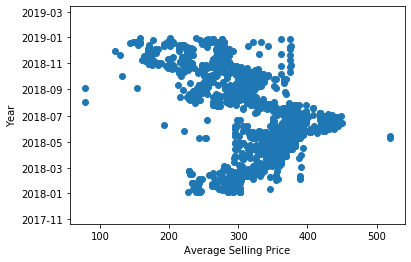

In [33]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Average Selling Price")
plt.ylabel("Year")
### END SOLUTION

# TN 2019

In [21]:
TN_df_19 = Merged_TN_df.loc[Merged_TN_df['0FISCYEAR']==2019]
TN_df_19.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,Ship To County,Ship To State,Ship To Region,Ship To Country,Cal_Quarter_text,Fiscal_Year_Period_Text,Product ID,Mill_Amount_in_SC,Qty_in_Conv_Vol,ASP
9620,1/1/2019 0:00,-3,-8,0.4,3.5,1,1,26,4:09 AM,2:56 PM,...,WILSON,Tennessee,SOUTHEAST,US,2019.Q1,2019.01,39947,4888.52,35,139.67
9621,1/1/2019 0:00,-3,-8,0.4,3.5,1,1,26,4:09 AM,2:56 PM,...,WILLIAMSON,Tennessee,SOUTHEAST,US,2019.Q1,2019.01,22651,9395.05,37,253.92
9622,1/1/2019 0:00,-3,-8,0.4,3.5,1,1,26,4:09 AM,2:56 PM,...,WILLIAMSON,Tennessee,SOUTHEAST,US,2019.Q1,2019.01,39956,7102.03,36,197.28
9623,1/1/2019 0:00,-3,-8,0.4,3.5,1,1,26,4:09 AM,2:56 PM,...,RUTHERFORD,Tennessee,SOUTHEAST,US,2019.Q1,2019.01,39956,7264.32,36,201.79
9624,1/1/2019 0:00,-3,-8,0.4,3.5,1,1,26,4:09 AM,2:56 PM,...,WILSON,Tennessee,SOUTHEAST,US,2019.Q1,2019.01,39947,4888.52,35,139.67


In [30]:
TN_df_19.to_csv(r'TN_Weather_19.csv', index = False)

In [22]:
 # Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = TN_df_19["ASP"].values.reshape(-1, 1)
y = TN_df_19["Date"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2186, 1) (2186, 1)


Text(0, 0.5, 'Year')

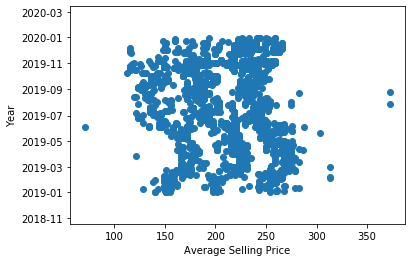

In [23]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Average Selling Price")
plt.ylabel("Year")
### END SOLUTION

# TN 2014-2020

In [24]:
Merged_TN_df_count = Merged_TN_df["ASP"].sum()

Merged_TN_df_count

2931804.64

In [25]:
 # Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = Merged_TN_df["ASP"].values.reshape(-1, 1)
y = Merged_TN_df["Date"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (11808, 1) (11808, 1)


Text(0, 0.5, 'Time Series')

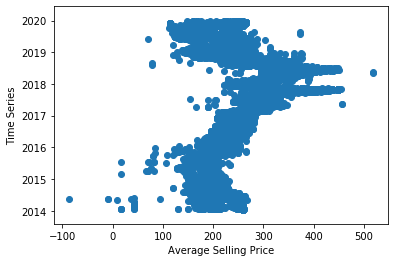

In [26]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Average Selling Price")
plt.ylabel("Time Series")
### END SOLUTION
